In [1]:
import spacy
#nlp = spacy.load("it_core_news_sm")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


/home/v.acampora/venv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-02 13:17:49.565331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-02 13:17:50.400021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
###################### carica dataset LDO 20-21 ############################ 

dataLDO2020 = pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20200101_20210101 pulito.ods', engine='odf')
dataLDO2021=pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20210101_20220101 pulito.ods', engine='odf')

# Filtra le righe che non contengono numeri (escludendo anche i NaN)
dataLDO2021 = dataLDO2021[dataLDO2021['nosologico'].astype(str).str.contains(r'\d')]
#rimosse 212 righe

In [3]:
###################### carica database filtrato ################

databaseFiltrato=pd.read_csv('/home/a.renda/to_move/LDO/labeled/20-21_341/DatabaseFiltrato.csv', sep=';')
print(databaseFiltrato.shape)
print(databaseFiltrato.columns) # la prima colonna è solo un contatore

# Filtra le righe che non contengono numeri (escludendo anche i NaN)
databaseFiltrato = databaseFiltrato[databaseFiltrato['nosologico'].astype(str).str.contains(r'\d')]

#tolte 5 righe

(26237, 3)
Index(['Unnamed: 0', 'nosologico', 'label'], dtype='object')


In [4]:
############################ filtra ldo 2020 ######################

# Converti la colonna 'nosologico' del secondo dataset in int
databaseFiltrato['nosologico'] = pd.to_numeric(databaseFiltrato['nosologico'], errors='coerce')

# Trova i nosologici comuni
comuni2020 = dataLDO2020['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2020 = dataLDO2020[comuni2020]
print(dataset_filtrato2020.columns)
print(dataset_filtrato2020.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(8974, 17)


In [5]:
############################ filtra ldo 2021 ######################

# Trova i nosologici comuni
comuni2021 = dataLDO2021['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2021 = dataLDO2021[comuni2021]
print(dataset_filtrato2021.columns)
print(dataset_filtrato2021.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(17218, 17)


In [6]:
######################## merge ldo2020 e ldo 2021 filtrati ###################################

merged_dataset = pd.concat([dataset_filtrato2020, dataset_filtrato2021], ignore_index=True) # non ci sono duplicati tra i due dataset 

# Risultato finale
print("\nColumns merged dataset:",merged_dataset.columns)
print("\nShape merged dataset:",merged_dataset.shape)
print(merged_dataset['testo'][0])



Columns merged dataset: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Shape merged dataset: (26192, 17)
ObesitÃ  di classe III complicata da ipertensione arteriosa, insulino-resistenza con ridotta tolleranza glucidica, epatomegalia steatosica, insufficienza venosa arti inferiori, ipovitaminosi D e ernia iatale,colelitiasi trattata con colecistectomia,regredita a obesitÃ  di classe I dopo intervento chirurgico di bypass gastrico (2011) al peso di 142 Kg con persistenza di ipovitaminosi D, remissione delle comorbiditÃ  e comparsa di ipoglicemia reattiva sintomatica. Micronodulia tiroidea. Anemia microcitica ipocrocromica, sideropenica. Emorroidi congeste del canale anale.Terapia consigliata alla dimissione:Pr: Bariatrifast cpS: 1 cp ore 8.00Pr: Gl

In [7]:
######################## carica dataset con nosologici positivi #####################

Positivi= pd.read_excel('/home/a.renda/to_move/LDO/labeled/20-21_341/NosologiciPositivi_341.xlsx')

################################### aggiungere la colonna positivi #########################################

# Convertire la colonna 'Nosologico' in numerico nel dataset NosologiciPositivi
nosologici_positivi = pd.to_numeric(Positivi['NosologiciPositivi'], errors='coerce').dropna()

# Creare la colonna 'positivi' nel DataFrame merged_dataset
merged_dataset['positivi'] = merged_dataset['nosologico'].isin(nosologici_positivi).astype(int)


# Contare quanti 1 e quanti 0 ci sono nella colonna 'positivi'
count_positivi = merged_dataset['positivi'].value_counts()

# Stampa i risultati
print("\nConteggio dei valori nella colonna 'positivi':")
print(f"Numero di 1 (positivi): {count_positivi.get(1, 0)}")
print(f"Numero di 0 (non positivi): {count_positivi.get(0, 0)}")


Conteggio dei valori nella colonna 'positivi':
Numero di 1 (positivi): 341
Numero di 0 (non positivi): 25851


In [8]:
# Unire parole e numeri in 'reparto' rimuovendo lo spazio e sostituendo con un trattino
merged_dataset['reparto'] = merged_dataset['reparto'].str.replace(r'(\w) (\d)', r'\1-\2', regex=True)

# Visualizza i risultati
print(merged_dataset['reparto'].head())


0    UO Endocrinologia-1
1    UO Endocrinologia-1
2    UO Endocrinologia-1
3    UO Endocrinologia-1
4    UO Endocrinologia-1
Name: reparto, dtype: object


In [9]:
###################### pulisci il testo: risoluzione di errori di codifica, sostituzione caratteri speciali #######################

import ftfy

# Applica ftfy.fix_text() a tutte le colonne di testo nel dataset, gestendo i valori non testuali
for col in merged_dataset.select_dtypes(include='object').columns:
    merged_dataset[col] = merged_dataset[col].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)

In [10]:
################################ traduzione ################################

import spacy
from transformers import MBart50Tokenizer, MBartForConditionalGeneration
import torch
from joblib import Parallel, delayed
import pandas as pd
import os
from tqdm import tqdm


# Inizializza spaCy e il modello linguistico italiano
nlp = spacy.load("it_core_news_sm")

# Configurazione modello e tokenizer
model_name = "facebook/mbart-large-50-many-to-many-mmt"
tokenizer = MBart50Tokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model.to(device)

# Parametri
src_lang = "it_IT"
tgt_lang = "en_XX"
tokenizer.src_lang = src_lang
max_length = 512  # Numero massimo di token per segmento

# Funzione per contare i token
def conta_token(text, tokenizer):
    return len(tokenizer.encode(text, add_special_tokens=False))

# Funzione per segmentare il testo in frasi con spaCy
def segmenta_testo(testo):
    if not isinstance(testo, str):  # Gestisce i valori non stringa
        return []
    doc = nlp(testo)
    frasi = [sent.text.strip() for sent in doc.sents]
    return frasi

# Funzione per creare segmenti che rispettano il limite massimo di token
def crea_segmenti(frammenti, max_length, tokenizer):
    segmenti = []
    segmento_corrente = []
    token_correnti = 0

    for frase in frammenti:
        # Conta i token della frase
        num_token = conta_token(frase, tokenizer)

        # Se aggiungere la frase supera il limite, salva il segmento corrente
        if token_correnti + num_token > max_length:
            segmenti.append(" ".join(segmento_corrente))
            segmento_corrente = [frase]
            token_correnti = num_token
        else:
            segmento_corrente.append(frase)
            token_correnti += num_token

    # Aggiungi l'ultimo segmento
    if segmento_corrente:
        segmenti.append(" ".join(segmento_corrente))

    return segmenti

# Funzione per tradurre un segmento
def traduci_segmento(segment_text, tokenizer, model, src_lang, tgt_lang, device):
    tokenizer.src_lang = src_lang
    encoded_input = tokenizer(segment_text, return_tensors="pt", truncation=True, max_length=max_length).to(device)
    translated_tokens = model.generate(
        **encoded_input,
        forced_bos_token_id=tokenizer.lang_code_to_id[tgt_lang],
        max_length=max_length
    )
    return tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

# Funzione per tradurre un testo lungo
def traduci_testo_corretto(testo, max_length, tokenizer, model, src_lang, tgt_lang, device):
    # Segmenta il testo in frasi usando spaCy
    frasi = segmenta_testo(testo)

    # Crea segmenti rispettando il limite massimo di token
    segmenti = crea_segmenti(frasi, max_length, tokenizer)

    # Traduci ogni segmento
    traduzioni = []
    for idx, segmento in enumerate(segmenti):
        traduzione_segmento = traduci_segmento(segmento, tokenizer, model, src_lang, tgt_lang, device)
        traduzioni.append(traduzione_segmento)

    # Combina le traduzioni
    traduzione_finale = " ".join(traduzioni)
    return traduzione_finale

# Funzione per tradurre tutte le righe del dataset per le 13 colonne
def traduci_riga(row, colonne_da_tradurre, max_length, tokenizer, model, src_lang, tgt_lang, device):
    result = {}
    for colonna in colonne_da_tradurre:
        testo = row[colonna]  # Estrai il testo dalla colonna
        
        # Verifica che il testo sia una stringa prima di procedere con la traduzione
        if isinstance(testo, str):
            traduzione = traduci_testo_corretto(testo, max_length, tokenizer, model, src_lang, tgt_lang, device)
            result[f"{colonna}_tradotto"] = traduzione
        else:
            # Se non è una stringa, puoi convertire il dato in stringa
            result[f"{colonna}_tradotto"] = str(testo)  # Converte il valore non stringa in stringa

    return result


# Funzione per tradurre l'intero dataset e salvare progressivamente nel workspace
def traduci_dataset_e_salva(dataset, colonne_da_tradurre, workspace_file, tokenizer, model, src_lang, tgt_lang, device, batch_size=30):
    """
    Traduce un intero dataset riga per riga e salva progressivamente nel workspace.
    """
    # Controlla se esiste già un workspace
    if os.path.exists(workspace_file):
        # Carica i progressi dal workspace
        translated_dataset = pd.read_pickle(workspace_file)
        start_idx = len(translated_dataset)
        print(f"Rilevato workspace con {start_idx} righe tradotte.")
    else:
        # Se non esiste, crea un nuovo dataset tradotto vuoto
        translated_dataset = pd.DataFrame(columns=dataset.columns)
        start_idx = 0

    # Traduce il dataset riga per riga
    for start in tqdm(range(start_idx, len(dataset), batch_size), desc="Traduzione batch"):
        end = min(start + batch_size, len(dataset))  # Fissa il limite massimo per l'ultimo batch
        batch = dataset.iloc[start:end]

        # Accumula le righe tradotte
        translated_rows = []
        for _, row in batch.iterrows():
            translated_row = row.copy()
            # Traduce per ogni colonna da tradurre
            for colonna in colonne_da_tradurre:
                # Verifica se la colonna è presente nella riga e se contiene una stringa
                if colonna in row and isinstance(row[colonna], str):
                    testo = row[colonna]
                    traduzione = traduci_testo_corretto(testo, max_length, tokenizer, model, src_lang, tgt_lang, device)
                    translated_row[f"{colonna}_tradotto"] = traduzione
                else:
                    # Se non è una stringa converti
                    translated_row[f"{colonna}_tradotto"] = str(row[colonna]) 
            # Aggiungi la riga tradotta alla lista
            translated_rows.append(translated_row)

        # Aggiungi le nuove righe tradotte al dataset tradotto
        translated_dataset = pd.concat([translated_dataset, pd.DataFrame(translated_rows)], ignore_index=True)

        # Salva il workspace ogni batch
        translated_dataset.to_pickle(workspace_file)
        print(f"Salvato workspace aggiornato con {len(translated_dataset)} righe.")

    return translated_dataset

# Lista delle colonne da preprocessare
colonne_da_tradurre = ['testo', 'motivo_ricovero', 'anamnesi', 'esameobiettivo', 
                            'terapiafarmaingresso', 'decorso', 'laboratorio', 'interventi', 
                            'followup', 'terapie2', 'terapie3', 'esami', 'reparto']

workspace_file = "workspaceFinal.pkl"  # File workspace
output_file = "translated_datasetFinal.csv"  # File tradotto finale

# Esegui la traduzione e salva progressivamente
translated_dataset = traduci_dataset_e_salva(merged_dataset, 
                                             colonne_da_tradurre, 
                                             workspace_file, 
                                             tokenizer, model, 
                                             src_lang, tgt_lang, 
                                             device, batch_size=30)

# Salva il dataset tradotto finale in CSV
translated_dataset.to_csv(output_file, index=False)
print(f"Traduzione completata. Risultati finali salvati in: {output_file}")

Rilevato workspace con 26192 righe tradotte.


Traduzione batch: 0it [00:00, ?it/s]


Traduzione completata. Risultati finali salvati in: translated_datasetFinal.csv


In [75]:
print(merged_dataset['anamnesi'][58])
print(translated_dataset['anamnesi_tradotto'][58])

Motivo del ricovero: paziente trasferito dalla U.O. Medicina d'Urgenza e PS subintensiva per shock settico complicato da coma iperosmolare in fascite necrotizzante della mano destra. Diabete scompensato di nuova diagnosi.Il paziente accedeva al PS (Cisanello) in data 25 Novembre 2020 in stato di coma, dove veniva posta diagnosi di  shock settico complicato da coma iperosmolare in fascite necrotizzante della mano destra. Diabete scompensato di nuova diagnosi. Il paziente riferisce di essere stato graffiato dal proprio cane a livello della mano destra circa 3 giorni prima dell'accesso al PS. Negli ultimi 3 mesi riferisce marcata astenia, poliuria e polidipsia.Esami all'ingresso in PS: 46.600 GB, Glucosio:  1023 mg/dL; Creatinina:  2,31 mg/dL;Sodio:  126 mEq/L; Potassio:  6,09 mEq/L;Cloro:  88 mEq/L;CK:  128 U/L; Amilasi:  64 U/L; Lipasi:  172 U/L; Colinesterasi:  6743 U/L; Mioglobina:  951 mcg/L; PCT 0.8.HbA1c: 135Emocolture positive per S. Hominis, S. Epidermidis, S. Capitis e Clostridi

In [11]:
print(translated_dataset.shape)
print(translated_dataset.columns)

(26192, 31)
Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto', 'positivi', 'testo_tradotto',
       'motivo_ricovero_tradotto', 'anamnesi_tradotto',
       'esameobiettivo_tradotto', 'terapiafarmaingresso_tradotto',
       'decorso_tradotto', 'laboratorio_tradotto', 'interventi_tradotto',
       'followup_tradotto', 'terapie2_tradotto', 'terapie3_tradotto',
       'esami_tradotto', 'reparto_tradotto'],
      dtype='object')


In [58]:
# Per ogni riga, stampa ciascuna colonna tradotta 
for index, row in translated_dataset.iterrows():
    print(f"Riga {index + 1}:")
    for colonna in colonne_da_tradurre:
        colonna_tradotta = f"{colonna}_tradotto"
        testo_originale = row[colonna] if colonna in row else None
        testo_tradotto = row[colonna_tradotta] if colonna_tradotta in row else None
        print(f"  Colonna originale '{colonna}': {testo_originale}")
        print(f"  Colonna tradotta '{colonna_tradotta}': {testo_tradotto}")
    print("-" * 80)  # Separatore tra righe


Riga 1:
  Colonna originale 'testo': Obesità di classe III complicata da ipertensione arteriosa, insulino-resistenza con ridotta tolleranza glucidica, epatomegalia steatosica, insufficienza venosa arti inferiori, ipovitaminosi D e ernia iatale,colelitiasi trattata con colecistectomia,regredita a obesità di classe I dopo intervento chirurgico di bypass gastrico (2011) al peso di 142 Kg con persistenza di ipovitaminosi D, remissione delle comorbidità e comparsa di ipoglicemia reattiva sintomatica. Micronodulia tiroidea. Anemia microcitica ipocrocromica, sideropenica. Emorroidi congeste del canale anale.Terapia consigliata alla dimissione:Pr: Bariatrifast cpS: 1 cp ore 8.00Pr: Glucobay 50 mg cpS: 1 cp a colazione 1 cp a pranzo 1 cp a cena  da aumentare a 2 cp a colazione 2 cp a pranzo e 2 cp a cena in base alla sintomatologia e fino a nuove indicazione. Pr: Sideral forte cpS: 1 cp al giorno a digiuno   
  Colonna tradotta 'testo_tradotto': Class III obesity complicated by arterial hyperte

In [ ]:
######################################################################

In [11]:
########################## preprocessing traduzione ############################

import spacy
import pandas as pd
import re

# Carica il modello SpaCy per l'inglese
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Lista delle colonne su cui applicare il preprocessing
colonne_da_preprocessare = ['testo_tradotto', 'motivo_ricovero_tradotto', 'anamnesi_tradotto', 
                             'esameobiettivo_tradotto', 'terapiafarmaingresso_tradotto', 
                             'decorso_tradotto', 'laboratorio_tradotto', 'interventi_tradotto', 
                             'followup_tradotto', 'terapie2_tradotto', 'terapie3_tradotto', 
                             'esami_tradotto', 'reparto_tradotto']

# Funzione per preprocessare una riga di testo
def preprocess_text(row):
    """
    Preprocessa una stringa di testo applicando le seguenti trasformazioni:
    1. Rimozione di date e numeri speciali.
    2. Aggiunta di spazi tra numeri e lettere.
    3. Normalizzazione di parole composte (camelCase).
    4. Rimozione di punteggiatura e caratteri speciali.
    5. Tokenizzazione, lemmatizzazione e rimozione di stopwords con SpaCy.
    """
    if not isinstance(row, str) or not row:  # Aggiungi controllo per valori non stringa o vuoti (oppure not row.strip())
        return ""  # Restituisce una stringa vuota se non valido

    # Rimuove parole esatte "μl", "μg" e simili
    #row = re.sub(r'\b[μu]\w*\b', '', row)

    # Rimuove sequenze numeriche separate da underscore o trattini (es. "6_2_5_1" o "6-2-5-1")
    #row = re.sub(r'\b\d+([_\-]\d+)+\b', '', row)

    # Rimuove date nel formato 'dd/mm/yyyy' e 'dd/mm/yy'
    row = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '', row)
    row = re.sub(r'\d{1,2}/\d{1,2}', '', row)  # Rimuove numeri separati da /

    # Aggiunge spazi tra numeri e lettere (es. "800paracetamol" -> "800 paracetamol")
    row = re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', row)
    row = re.sub(r'([a-zA-Z]+)(\d+)', r'\1 \2', row)

    # Normalizza parole composte tipo "seeAttachment" -> "see Attachment"
    row = re.sub(r'([a-z])([A-Z])', r'\1 \2', row)

    # Rimuove punteggiatura e normalizza gli spazi multipli
    row = re.sub(r'[^\w\s]', ' ', row)  # Rimuove caratteri non alfanumerici (compresa punteggiatura)
    row = re.sub(r'\s+', ' ', row).strip()  # Normalizza spazi multipli

    # Rimuove i numeri
    row = re.sub(r'\b\d+\b', '', row)  # Rimuove numeri isolati

    # Tokenizza il testo con SpaCy
    doc = nlp(row)

    # Filtra stopwords, punteggiatura e token non validi
    tokens_puliti = [
        token.lemma_.lower()  # Lemmatizzazione e lowercase
        for token in doc
        if not token.is_punct and not token.is_stop and len(token.text) > 1
    ]

    # Applica un filtro finale per rimuovere parole troppo corte
    tokens_puliti = [token for token in tokens_puliti if len(token) > 1]

    # Ricombina i token in una stringa
    return " ".join(tokens_puliti)


# Preprocessing riga per riga
for colonna in colonne_da_preprocessare:
    print(f"Processando colonna: {colonna}")
    preprocessed_rows = []
    for idx, row in translated_dataset[colonna].items():
        if not isinstance(row, str):
            preprocessed_rows.append("")
        else:
            try:
                preprocessed_rows.append(preprocess_text(row))
            except Exception as e:
                print(f"Errore alla riga {idx} nella colonna {colonna}: {e}")
                preprocessed_rows.append("")
    translated_dataset[colonna] = preprocessed_rows

# Output del dataset preprocessato
print("\nDataset preprocessato:")
print(translated_dataset.head())

Processando colonna: testo_tradotto
Processando colonna: motivo_ricovero_tradotto
Processando colonna: anamnesi_tradotto
Processando colonna: esameobiettivo_tradotto
Processando colonna: terapiafarmaingresso_tradotto
Processando colonna: decorso_tradotto
Processando colonna: laboratorio_tradotto
Processando colonna: interventi_tradotto
Processando colonna: followup_tradotto
Processando colonna: terapie2_tradotto
Processando colonna: terapie3_tradotto
Processando colonna: esami_tradotto
Processando colonna: reparto_tradotto

Dataset preprocessato:
   nosologico     time_inserimento  dataInizio    dataFine  \
0  2020000632  2020-01-13 14:42:15  2020-01-07  2020-01-13   
1  2020001627  2020-01-14 15:54:20  2020-01-13  2020-01-15   
2  2020001616  2020-01-14 17:20:55  2020-01-13  2020-01-14   
3  2020002066  2020-01-16 08:26:39  2020-01-15  2020-01-16   
4  2020002480  2020-01-17 17:33:06  2020-01-17  2020-01-20   

                                               testo  \
0  Obesità di clas

In [13]:
############################ DIMENSIONE VOCABOLARIO ############################
# Calcola il vocabolario
vocab_set = set()
# Itera sulle prime 100 righe delle colonne preprocessate
for colonna in colonne_da_preprocessare:
    for testo in translated_dataset[colonna]:  # Limita a 100 righe
        if isinstance(testo, str):  # Assicurati che il testo non sia NaN
            vocab_set.update(testo.split())

# Calcola la dimensione del vocabolario
vocabolario_dimensione = len(vocab_set)
print("Dimensione del vocabolario:", vocabolario_dimensione)

Dimensione del vocabolario: 124431


In [12]:
########################## CLASSIFIERS #################

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Definisci una lista di classificatori che vuoi provare
classifiers = {
    #'RandomForest': RandomForestClassifier(n_jobs=-1, max_depth=10, max_features=0.1, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=5000),
    #'SVM': SVC(probability=True,random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(max_depth=10, random_state=42),
    #'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    #'extremeGradientBoosting': XGBClassifier(learning_rate=0.1, random_state=42, n_jobs=-1, max_depth=6),
}

In [13]:
########################### CROSS VALIDATION #########################

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict


# Funzione modificata per includere la media delle features
def eval_cross_validation(pipeline, X, y, skf):
    list_reports = []
    list_f1 = []
    list_auc = []  # Lista per raccogliere i valori di AUC mediati
    list_num_features = []  # Lista per raccogliere il numero di features per ogni fold
    
    # Crea una lista per raccogliere precision, recall e f1-score mediati
    precision_sum = {}
    recall_sum = {}
    f1_sum = {}
    
    # Liste per la deviazione standard
    precision_values = {}
    recall_values = {}
    f1_values = {}

    # Inizializza il supporto per ogni classe
    unique_labels = np.unique(y)  # Usa np.unique per gli array NumPy
    support_sum = {str(label): 0 for label in unique_labels}  # Assicurati che le etichette siano stringhe

    for train, val in skf.split(X, y):
        X_tr = X.iloc[train]  # differenza con 'baseline1'
        y_tr = y[train]  # Modifica per lavorare con l'array NumPy
        X_val = X.iloc[val]
        y_val = y[val]  # Modifica per lavorare con l'array NumPy

        # Addestra il pipeline sul training set
        pipeline.fit(X_tr, y_tr)

        # Previsioni sul validation set
        y_pred = pipeline.predict(X_val)
        y_pred_prob = pipeline.predict_proba(X_val)[:, 1]  # Probabilità della classe positiva

        # Crea il classification report come dizionario
        cr = classification_report(y_val, y_pred, output_dict=True)

        # Aggiungi il report alla lista
        list_reports.append(cr)

        # Estrai il F1-score
        list_f1.append(cr['weighted avg']['f1-score'])

        # Calcola l'AUC per questo fold
        auc_score = roc_auc_score(y_val, y_pred_prob)
        list_auc.append(auc_score)

        # Raccogli il numero di features per questo fold
        X_word2vec = pipeline.named_steps['multi_word2vec'].transform(X_val)  # Modificato per estrarre la trasformazione
        list_num_features.append(X_word2vec.shape[1])  # Numero di features per questo fold

        # Somma le metriche per ogni classe
        for label, metrics in cr.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                precision_sum[label] = precision_sum.get(label, 0) + metrics['precision']
                recall_sum[label] = recall_sum.get(label, 0) + metrics['recall']
                f1_sum[label] = f1_sum.get(label, 0) + metrics['f1-score']

                # Aggiungi valori per la deviazione standard
                precision_values[label] = precision_values.get(label, []) + [metrics['precision']]
                recall_values[label] = recall_values.get(label, []) + [metrics['recall']]
                f1_values[label] = f1_values.get(label, []) + [metrics['f1-score']]

                # Somma il supporto per questa fold
                support_sum[str(label)] += metrics['support']  # Usa str(label) per garantire la corrispondenza

    # Calcola la media dell'AUC
    auc_avg = np.mean(list_auc)

    # Calcola la media del numero di features
    num_features_avg = np.mean(list_num_features)

    # Calcola la media delle metriche per ogni classe
    num_folds = skf.get_n_splits()
    precision_avg = {label: precision_sum[label] / num_folds for label in precision_sum}
    recall_avg = {label: recall_sum[label] / num_folds for label in recall_sum}
    f1_avg_per_class = {label: f1_sum[label] / num_folds for label in f1_sum}

    # Calcola la deviazione standard per ogni metrica
    precision_std = {label: np.std(precision_values[label]) for label in precision_values}
    recall_std = {label: np.std(recall_values[label]) for label in recall_values}
    f1_std = {label: np.std(f1_values[label]) for label in f1_values}

    # Calcola il supporto medio per ciascuna classe
    support_avg = {label: support_sum[label] / num_folds for label in support_sum}

    # Crea un DataFrame per visualizzare le metriche
    df_avg = pd.DataFrame({
        'Precision': precision_avg,
        'Recall': recall_avg,
        'F1-Score': f1_avg_per_class,
        'Precision Std': precision_std,
        'Recall Std': recall_std,
        'F1-Score Std': f1_std,
        'Support': support_avg,  # Supporto medio
        'Avg Features': num_features_avg,  # Media delle features
    })  # Trasponi per avere le classi come righe

    return df_avg, auc_avg, f1_avg_per_class, num_features_avg 

# Crea un oggetto StratifiedKFold per la cross-validation stratificata
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
################################## calcolo oov con tokenizzazione spacy #######################################
##################################### bio embedding #####################################################

import spacy
import numpy as np
from collections import Counter
from gensim.models import KeyedVectors
from sklearn.preprocessing import LabelEncoder

columns_to_vectorize = ['testo_tradotto', 'motivo_ricovero_tradotto', 'anamnesi_tradotto', 
                             'esameobiettivo_tradotto', 'terapiafarmaingresso_tradotto', 
                             'decorso_tradotto', 'laboratorio_tradotto', 'interventi_tradotto', 
                             'followup_tradotto', 'terapie2_tradotto', 'terapie3_tradotto', 
                             'esami_tradotto', 'reparto_tradotto']

X = translated_dataset[columns_to_vectorize]  # Passa l'intero dataset, con le 13 colonne
y = translated_dataset['positivi']
# Converti le etichette in numeri con LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Trasforma le etichette in numeri


# Carica il modello SpaCy (puoi usare "en_core_web_sm" o un altro modello disponibile)
nlp = spacy.load("en_core_web_lg", disable=["parser", "ner"])  # Disabilita parser e ner per velocità

def tokenize_with_spacy(text):
    """
    Tokenizza un testo usando SpaCy.
    :param text: stringa preprocessata.
    :return: lista di token.
    """
    if not isinstance(text, str) or not text.strip():
        return []
    
    # Tokenizza il testo usando SpaCy
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_space]  # Esclude spazi vuoti
    return tokens

def calculate_oov_percentage_word2vec(texts, word2vec_model, global_oov_counter, global_valid_words):
    total_words = 0
    oov_words = 0

    for text in texts:
        # Usa SpaCy per tokenizzare
        words = tokenize_with_spacy(text)
        
        total_words += len(words)
        
        for word in words:
            # Controlla se la parola è presente nel vocabolario di Word2Vec
            if word in word2vec_model:
                global_valid_words.add(word)  # Aggiungi al set globale delle parole valide
            else:
                oov_words += 1
                global_oov_counter[word] += 1  # Aggiungi alla conta globale degli OOV
    
    # Calcola la percentuale di OOV
    oov_percentage = (oov_words / total_words) * 100 if total_words > 0 else 0
    return oov_words, total_words, oov_percentage

# Carica il modello pre-addestrato di Word2Vec
word2vec_model_path = "/home/v.acampora/bio_embedding_intrinsic"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

# Contatori globali
global_oov_counter = Counter()  # Per tenere traccia delle parole OOV globali
global_valid_words = set()  # Per tenere traccia delle parole valide globali

# Se hai un DataFrame, applica la funzione per ciascuna colonna
all_oov_words = 0
all_total_words = 0

for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano in formato stringa
    oov_words, total_words, oov_percentage = calculate_oov_percentage_word2vec(
        texts, word2vec_model, global_oov_counter, global_valid_words)
    
    # Aggiorna i contatori globali
    all_oov_words += oov_words
    all_total_words += total_words

    print(f"Parole OOV nella colonna '{col}': {oov_words}, Totale parole: {total_words}, Percentuale OOV: {oov_percentage:.2f}%")

# Calcolo delle statistiche globali
total_unique_words = len(global_valid_words) + len(global_oov_counter)
oov_percentage_global = (len(global_oov_counter) / total_unique_words) * 100 if total_unique_words > 0 else 0

# Risultati globali
print("\n### Statistiche globali ###")
print(f"Totale parole valide uniche: {len(global_valid_words)}")
print(f"Totale parole OOV uniche: {len(global_oov_counter)}")
print(f"Totale parole uniche (valide + OOV): {total_unique_words}")
print(f"Percentuale globale di parole OOV: {oov_percentage_global:.2f}%")

# Stampa le prime 50 parole OOV globali
print("\nPrime 50 parole OOV globali ordinate per frequenza:")
for i, (word, count) in enumerate(global_oov_counter.most_common(500)):
    print(f"{i+1}. {word}: {count}")

Calcolando OOV per la colonna: testo_tradotto
Parole OOV nella colonna 'testo_tradotto': 18965, Totale parole: 511676, Percentuale OOV: 3.71%
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Parole OOV nella colonna 'motivo_ricovero_tradotto': 7445, Totale parole: 225413, Percentuale OOV: 3.30%
Calcolando OOV per la colonna: anamnesi_tradotto
Parole OOV nella colonna 'anamnesi_tradotto': 185178, Totale parole: 4536143, Percentuale OOV: 4.08%
Calcolando OOV per la colonna: esameobiettivo_tradotto
Parole OOV nella colonna 'esameobiettivo_tradotto': 35025, Totale parole: 908435, Percentuale OOV: 3.86%
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Parole OOV nella colonna 'terapiafarmaingresso_tradotto': 25359, Totale parole: 298958, Percentuale OOV: 8.48%
Calcolando OOV per la colonna: decorso_tradotto
Parole OOV nella colonna 'decorso_tradotto': 119568, Totale parole: 3561638, Percentuale OOV: 3.36%
Calcolando OOV per la colonna: laboratorio_tradotto
Parole OOV nell

Calcolando OOV per la colonna: testo_tradotto
Completato per colonna: testo_tradotto
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Completato per colonna: motivo_ricovero_tradotto
Calcolando OOV per la colonna: anamnesi_tradotto
Completato per colonna: anamnesi_tradotto
Calcolando OOV per la colonna: esameobiettivo_tradotto
Completato per colonna: esameobiettivo_tradotto
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Completato per colonna: terapiafarmaingresso_tradotto
Calcolando OOV per la colonna: decorso_tradotto
Completato per colonna: decorso_tradotto
Calcolando OOV per la colonna: laboratorio_tradotto
Completato per colonna: laboratorio_tradotto
Calcolando OOV per la colonna: interventi_tradotto
Completato per colonna: interventi_tradotto
Calcolando OOV per la colonna: followup_tradotto
Completato per colonna: followup_tradotto
Calcolando OOV per la colonna: terapie2_tradotto
Completato per colonna: terapie2_tradotto
Calcolando OOV per la colonna: terapie

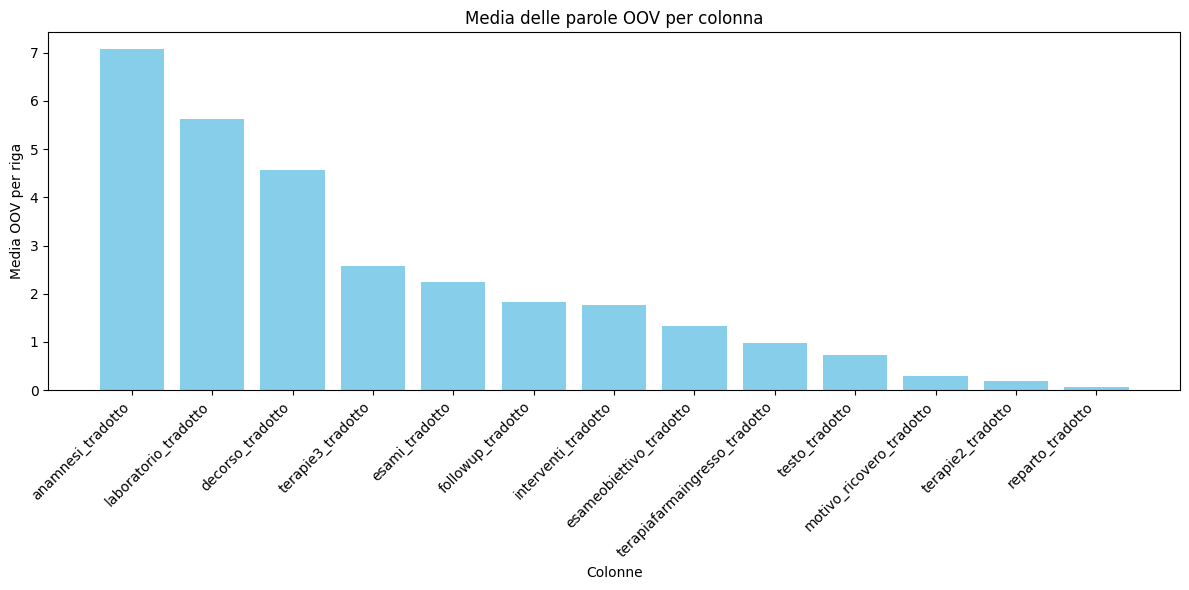

In [20]:
import matplotlib.pyplot as plt

# Dizionario per contare le parole OOV per ogni riga di ogni colonna
column_oov_counts = {col: [] for col in X.columns}

# Calcolo degli OOV per riga in ogni colonna
for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano stringhe
    for text in texts:
        words = tokenize_with_spacy(text)  # Usa la tokenizzazione con SpaCy
        oov_count = sum(1 for word in words if word not in word2vec_model)
        column_oov_counts[col].append(oov_count)  # Aggiungi il conteggio di OOV per questa riga
    
    print(f"Completato per colonna: {col}")

# Calcolare la media degli OOV per ogni colonna rispetto a tutte le righe
column_oov_averages = {col: np.mean(oov_counts) for col, oov_counts in column_oov_counts.items()}

# Ordinare le colonne per media di OOV decrescente
sorted_columns = sorted(column_oov_averages.items(), key=lambda x: x[1], reverse=True)

# Stampa delle colonne ordinate per media degli OOV
print("\n### Media degli OOV per colonna ###")
for col, avg_oov in sorted_columns:
    print(f"Colonna '{col}': Media OOV = {avg_oov:.2f}")

# Creare un grafico a barre con la media degli OOV per colonna
plt.figure(figsize=(12, 6))
columns = [item[0] for item in sorted_columns]
averages = [item[1] for item in sorted_columns]
plt.bar(columns, averages, color='skyblue')
plt.xlabel('Colonne')
plt.ylabel('Media OOV per riga')
plt.title('Media delle parole OOV per colonna')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Calcolando OOV per la colonna: testo_tradotto
Parole OOV nella colonna 'testo_tradotto': 18965, Totale parole: 511676, Percentuale OOV: 3.71%
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Parole OOV nella colonna 'motivo_ricovero_tradotto': 7445, Totale parole: 225413, Percentuale OOV: 3.30%
Calcolando OOV per la colonna: anamnesi_tradotto
Parole OOV nella colonna 'anamnesi_tradotto': 185178, Totale parole: 4536143, Percentuale OOV: 4.08%
Calcolando OOV per la colonna: esameobiettivo_tradotto
Parole OOV nella colonna 'esameobiettivo_tradotto': 35025, Totale parole: 908435, Percentuale OOV: 3.86%
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Parole OOV nella colonna 'terapiafarmaingresso_tradotto': 25359, Totale parole: 298958, Percentuale OOV: 8.48%
Calcolando OOV per la colonna: decorso_tradotto
Parole OOV nella colonna 'decorso_tradotto': 119568, Totale parole: 3561638, Percentuale OOV: 3.36%
Calcolando OOV per la colonna: laboratorio_tradotto
Parole OOV nell

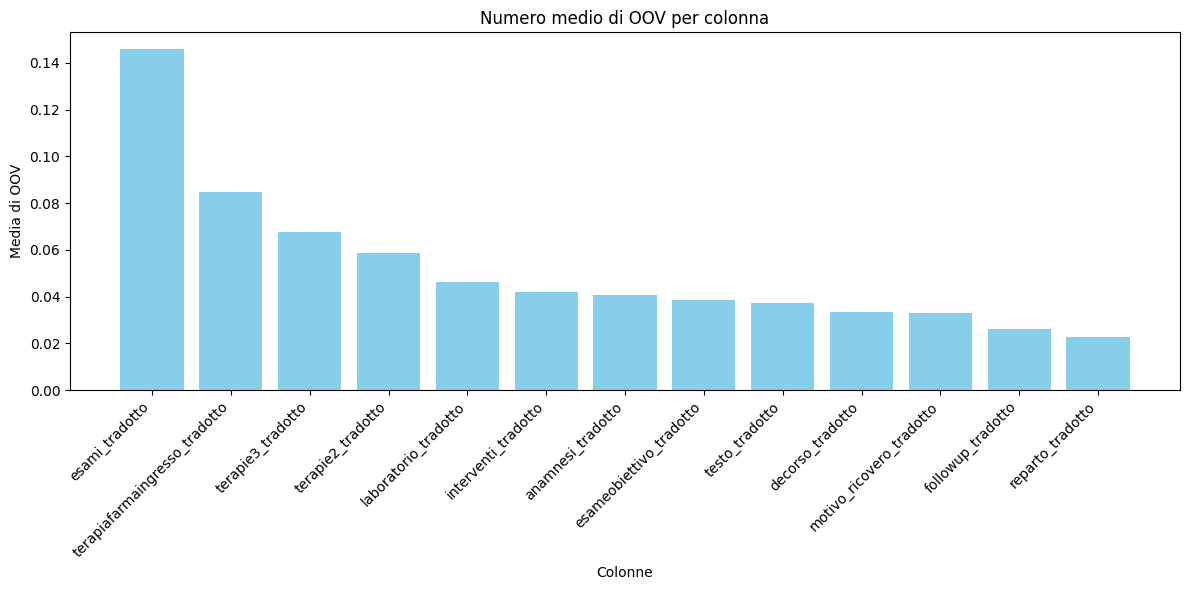

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Contenitore per le statistiche delle colonne
column_oov_stats = []

for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano in formato stringa
    oov_words, total_words, oov_percentage = calculate_oov_percentage_word2vec(
        texts, word2vec_model, global_oov_counter, global_valid_words)
    
    # Salva i dati per calcoli successivi
    column_oov_stats.append({
        "column": col,
        "oov_words": oov_words,
        "total_words": total_words,
        "oov_percentage": oov_percentage
    })

    # Aggiorna i contatori globali
    all_oov_words += oov_words
    all_total_words += total_words

    print(f"Parole OOV nella colonna '{col}': {oov_words}, Totale parole: {total_words}, Percentuale OOV: {oov_percentage:.2f}%")

# Calcolo delle statistiche globali
total_unique_words = len(global_valid_words) + len(global_oov_counter)
oov_percentage_global = (len(global_oov_counter) / total_unique_words) * 100 if total_unique_words > 0 else 0

# Risultati globali
print("\n### Statistiche globali ###")
print(f"Totale parole valide uniche: {len(global_valid_words)}")
print(f"Totale parole OOV uniche: {len(global_oov_counter)}")
print(f"Totale parole uniche (valide + OOV): {total_unique_words}")
print(f"Percentuale globale di parole OOV: {oov_percentage_global:.2f}%")

# Creazione del DataFrame per le statistiche per colonna
column_oov_stats_df = pd.DataFrame(column_oov_stats)
column_oov_stats_df["oov_per_word"] = column_oov_stats_df["oov_words"] / column_oov_stats_df["total_words"]

# Ordina le colonne per il numero medio di OOV
sorted_columns = column_oov_stats_df.sort_values("oov_per_word", ascending=False)

# Stampa delle colonne ordinate in base alla media degli OOV
print("\n### Colonne ordinate per numero medio di OOV ###")
print(sorted_columns[["column", "oov_per_word"]])

# Creazione del grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(sorted_columns["column"], sorted_columns["oov_per_word"], color='skyblue')
plt.title("Numero medio di OOV per colonna")
plt.xlabel("Colonne")
plt.ylabel("Media di OOV")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
################################################

In [12]:
############################# word2vec con embedding in inglese generici #########################i
import spacy
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Carica il modello SpaCy con embedding generali in inglese (ad esempio "en_core_web_md")
nlp = spacy.load("en_core_web_lg", disable=["parser", "ner"])  # Disabilita parser e ner per velocità

# Definizione delle colonne del tuo dataset
columns_to_vectorize = ['testo_tradotto', 'motivo_ricovero_tradotto', 'anamnesi_tradotto', 
                        'esameobiettivo_tradotto', 'terapiafarmaingresso_tradotto', 
                        'decorso_tradotto', 'laboratorio_tradotto', 'interventi_tradotto', 
                        'followup_tradotto', 'terapie2_tradotto', 'terapie3_tradotto', 
                        'esami_tradotto', 'reparto_tradotto']

X = translated_dataset[columns_to_vectorize]  # Passa l'intero dataset, con le 13 colonne
y = translated_dataset['positivi']
# Converti le etichette in numeri con LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Trasforma le etichette in numeri


def tokenize_with_spacy(text):
    """
    Tokenizza un testo usando SpaCy.
    :param text: stringa preprocessata.
    :return: lista di token.
    """
    if not isinstance(text, str) or not text.strip():
        return []
    
    # Tokenizza il testo usando SpaCy
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_space]  # Esclude spazi vuoti
    return tokens


def calculate_oov_percentage_spacy(texts, nlp, global_oov_counter, global_valid_words):
    total_words = 0
    oov_words = 0

    for text in texts:
        # Usa SpaCy per tokenizzare
        words = tokenize_with_spacy(text)
        
        total_words += len(words)
        
        for word in words:
            # Ottieni il token dal vocabolario spaCy
            token = nlp.vocab[word]  # Usa l'indicizzazione per ottenere il token

            if token.has_vector:  # Se la parola ha un vettore di embedding
                global_valid_words.add(word)  # Aggiungi al set globale delle parole valide
            else:
                oov_words += 1
                global_oov_counter[word] += 1  # Aggiungi alla conta globale degli OOV
    
    # Calcola la percentuale di OOV
    oov_percentage = (oov_words / total_words) * 100 if total_words > 0 else 0
    return oov_words, total_words, oov_percentage

# Contatori globali
global_oov_counter = Counter()  # Per tenere traccia delle parole OOV globali
global_valid_words = set()  # Per tenere traccia delle parole valide globali

# Se hai un DataFrame, applica la funzione per ciascuna colonna
all_oov_words = 0
all_total_words = 0

for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano in formato stringa
    oov_words, total_words, oov_percentage = calculate_oov_percentage_spacy(
        texts, nlp, global_oov_counter, global_valid_words)
    
    # Aggiorna i contatori globali
    all_oov_words += oov_words
    all_total_words += total_words

    print(f"Parole OOV nella colonna '{col}': {oov_words}, Totale parole: {total_words}, Percentuale OOV: {oov_percentage:.2f}%")

# Calcolo delle statistiche globali
total_unique_words = len(global_valid_words) + len(global_oov_counter)
oov_percentage_global = (len(global_oov_counter) / total_unique_words) * 100 if total_unique_words > 0 else 0

# Risultati globali
print("\n### Statistiche globali ###")
print(f"Totale parole valide uniche: {len(global_valid_words)}")
print(f"Totale parole OOV uniche: {len(global_oov_counter)}")
print(f"Totale parole uniche (valide + OOV): {total_unique_words}")
print(f"Percentuale globale di parole OOV: {oov_percentage_global:.2f}%")

# Stampa le prime 50 parole OOV globali
print("\nPrime 50 parole OOV globali ordinate per frequenza:")
for i, (word, count) in enumerate(global_oov_counter.most_common(50)):
    print(f"{i+1}. {word}: {count}")

Calcolando OOV per la colonna: testo_tradotto
Parole OOV nella colonna 'testo_tradotto': 48067, Totale parole: 511676, Percentuale OOV: 9.39%
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Parole OOV nella colonna 'motivo_ricovero_tradotto': 17371, Totale parole: 225413, Percentuale OOV: 7.71%
Calcolando OOV per la colonna: anamnesi_tradotto
Parole OOV nella colonna 'anamnesi_tradotto': 410973, Totale parole: 4536143, Percentuale OOV: 9.06%
Calcolando OOV per la colonna: esameobiettivo_tradotto
Parole OOV nella colonna 'esameobiettivo_tradotto': 62460, Totale parole: 908435, Percentuale OOV: 6.88%
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Parole OOV nella colonna 'terapiafarmaingresso_tradotto': 57845, Totale parole: 298958, Percentuale OOV: 19.35%
Calcolando OOV per la colonna: decorso_tradotto
Parole OOV nella colonna 'decorso_tradotto': 252590, Totale parole: 3561638, Percentuale OOV: 7.09%
Calcolando OOV per la colonna: laboratorio_tradotto
Parole OOV ne

Calcolando OOV per la colonna: testo_tradotto
Parole OOV nella colonna 'testo_tradotto': 48067, Totale parole: 511676, Percentuale OOV: 9.39%
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Parole OOV nella colonna 'motivo_ricovero_tradotto': 17371, Totale parole: 225413, Percentuale OOV: 7.71%
Calcolando OOV per la colonna: anamnesi_tradotto
Parole OOV nella colonna 'anamnesi_tradotto': 410973, Totale parole: 4536143, Percentuale OOV: 9.06%
Calcolando OOV per la colonna: esameobiettivo_tradotto
Parole OOV nella colonna 'esameobiettivo_tradotto': 62460, Totale parole: 908435, Percentuale OOV: 6.88%
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Parole OOV nella colonna 'terapiafarmaingresso_tradotto': 57845, Totale parole: 298958, Percentuale OOV: 19.35%
Calcolando OOV per la colonna: decorso_tradotto
Parole OOV nella colonna 'decorso_tradotto': 252590, Totale parole: 3561638, Percentuale OOV: 7.09%
Calcolando OOV per la colonna: laboratorio_tradotto
Parole OOV ne

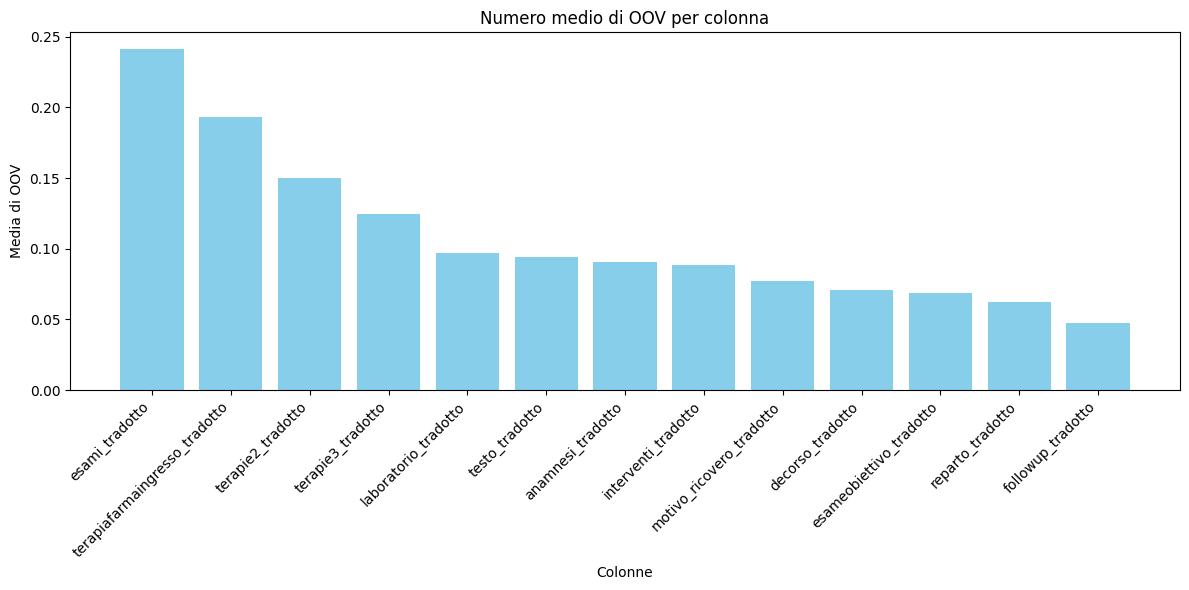

In [14]:
###################### grafico 

import matplotlib.pyplot as plt
import pandas as pd

# Contenitore per le statistiche delle colonne
column_oov_stats = []

for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano in formato stringa
    oov_words, total_words, oov_percentage = calculate_oov_percentage_spacy(
        texts, nlp, global_oov_counter, global_valid_words)
    
    # Salva i dati per calcoli successivi
    column_oov_stats.append({
        "column": col,
        "oov_words": oov_words,
        "total_words": total_words,
        "oov_percentage": oov_percentage
    })

    # Aggiorna i contatori globali
    all_oov_words += oov_words
    all_total_words += total_words

    print(f"Parole OOV nella colonna '{col}': {oov_words}, Totale parole: {total_words}, Percentuale OOV: {oov_percentage:.2f}%")

# Calcolo delle statistiche globali
total_unique_words = len(global_valid_words) + len(global_oov_counter)
oov_percentage_global = (len(global_oov_counter) / total_unique_words) * 100 if total_unique_words > 0 else 0

# Risultati globali
print("\n### Statistiche globali ###")
print(f"Totale parole valide uniche: {len(global_valid_words)}")
print(f"Totale parole OOV uniche: {len(global_oov_counter)}")
print(f"Totale parole uniche (valide + OOV): {total_unique_words}")
print(f"Percentuale globale di parole OOV: {oov_percentage_global:.2f}%")

# Creazione del DataFrame per le statistiche per colonna
column_oov_stats_df = pd.DataFrame(column_oov_stats)
column_oov_stats_df["oov_per_word"] = column_oov_stats_df["oov_words"] / column_oov_stats_df["total_words"]

# Ordina le colonne per il numero medio di OOV
sorted_columns = column_oov_stats_df.sort_values("oov_per_word", ascending=False)

# Stampa delle colonne ordinate in base alla media degli OOV
print("\n### Colonne ordinate per numero medio di OOV ###")
print(sorted_columns[["column", "oov_per_word"]])

# Creazione del grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(sorted_columns["column"], sorted_columns["oov_per_word"], color='skyblue')
plt.title("Numero medio di OOV per colonna")
plt.xlabel("Colonne")
plt.ylabel("Media di OOV")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Calcolando OOV per la colonna: testo_tradotto
Colonna 'testo_tradotto': Media OOV per riga: 1.84
Calcolando OOV per la colonna: motivo_ricovero_tradotto
Colonna 'motivo_ricovero_tradotto': Media OOV per riga: 0.66
Calcolando OOV per la colonna: anamnesi_tradotto
Colonna 'anamnesi_tradotto': Media OOV per riga: 15.69
Calcolando OOV per la colonna: esameobiettivo_tradotto
Colonna 'esameobiettivo_tradotto': Media OOV per riga: 2.38
Calcolando OOV per la colonna: terapiafarmaingresso_tradotto
Colonna 'terapiafarmaingresso_tradotto': Media OOV per riga: 2.21
Calcolando OOV per la colonna: decorso_tradotto
Colonna 'decorso_tradotto': Media OOV per riga: 9.64
Calcolando OOV per la colonna: laboratorio_tradotto
Colonna 'laboratorio_tradotto': Media OOV per riga: 11.74
Calcolando OOV per la colonna: interventi_tradotto
Colonna 'interventi_tradotto': Media OOV per riga: 3.74
Calcolando OOV per la colonna: followup_tradotto
Colonna 'followup_tradotto': Media OOV per riga: 3.28
Calcolando OOV per 

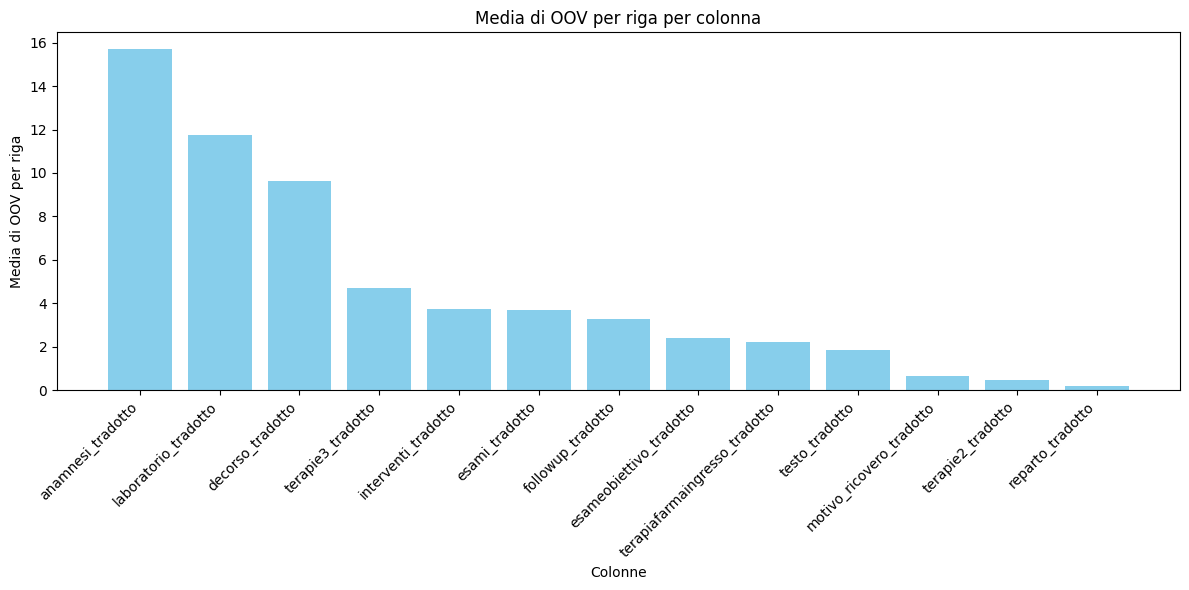

In [17]:
# Contenitore per le statistiche delle colonne
column_oov_stats = []

for col in X.columns:
    print(f"Calcolando OOV per la colonna: {col}")
    texts = X[col].dropna().astype(str).tolist()  # Assicurati che i dati siano in formato stringa
    
    # Lista per memorizzare il numero di OOV per ciascuna riga
    oov_per_row = []

    for text in texts:
        oov_words, total_words, _ = calculate_oov_percentage_spacy(
            [text], nlp, global_oov_counter, global_valid_words)
        oov_per_row.append(oov_words)  # Aggiungi il numero di OOV di questa riga

    # Calcola la media di OOV per riga
    mean_oov_per_row = np.mean(oov_per_row)

    # Salva i dati per calcoli successivi
    column_oov_stats.append({
        "column": col,
        "mean_oov_per_row": mean_oov_per_row
    })

    print(f"Colonna '{col}': Media OOV per riga: {mean_oov_per_row:.2f}")

# Creazione del DataFrame per le statistiche per colonna
column_oov_stats_df = pd.DataFrame(column_oov_stats)

# Ordina le colonne per la media di OOV per riga
sorted_columns = column_oov_stats_df.sort_values("mean_oov_per_row", ascending=False)

# Creazione del grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(sorted_columns["column"], sorted_columns["mean_oov_per_row"], color='skyblue')
plt.title("Media di OOV per riga per colonna")
plt.xlabel("Colonne")
plt.ylabel("Media di OOV per riga")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
#################################################


### Modello: extremeGradientBoosting ###
Dimensione della matrice Word2Vec: 26192 campioni, 2600 features


/home/v.acampora/venv2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/v.acampora/venv2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/v.acampora/venv2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/v.acampora/venv2/lib/pyth

Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.987278  0.999652  0.993426       0.000478    0.000321      0.000282   
1   0.293333  0.023529  0.042721       0.401331    0.034300      0.061565   

   Support  Avg Features  
0   2585.1        2600.0  
1     34.1        2600.0  
AUC medio: 0.9181
Numero medio di features: 2600.00


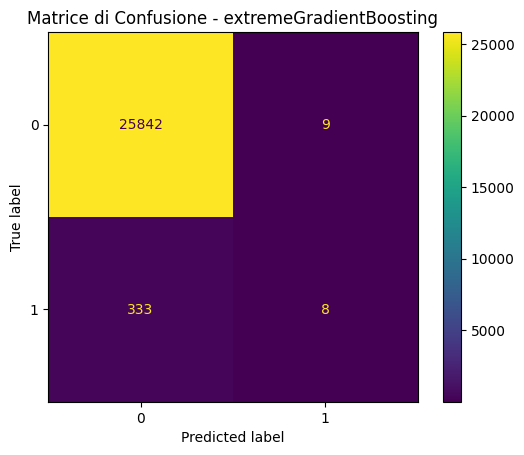

In [24]:
###################################### NO SMOTE #################################

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.preprocessing import LabelEncoder


# Carica il modello Word2Vec pre-addestrato
model_path = "/home/v.acampora/bio_embedding_intrinsic"
bioword_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Esegui la cross-validation per ogni classificatore
columns_to_vectorize = ['testo_tradotto', 'motivo_ricovero_tradotto', 'anamnesi_tradotto', 
                             'esameobiettivo_tradotto', 'terapiafarmaingresso_tradotto', 
                             'decorso_tradotto', 'laboratorio_tradotto', 'interventi_tradotto', 
                             'followup_tradotto', 'terapie2_tradotto', 'terapie3_tradotto', 
                             'esami_tradotto', 'reparto_tradotto']

X = translated_dataset[columns_to_vectorize]  # Passa l'intero dataset, con le 13 colonne
y = translated_dataset['positivi']
# Converti le etichette in numeri con LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Trasforma le etichette in numeri


class MultiColumnWord2Vec(BaseEstimator, TransformerMixin):
    def __init__(self, model, columns):
        self.model = model
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Funzione per vettorizzare il testo
        def vectorize_text(text):
            #words = word_tokenize(text.lower())  # Tokenizzazione e normalizzazione
            words = text.split()  # Semplice divisione in parole basata su spazio
            word_vectors = []
            for word in words:
                if word in self.model:  # Se la parola è nel vocabolario di Word2Vec
                    word_vectors.append(self.model[word])
            if word_vectors:
                return np.mean(word_vectors, axis=0)  # Media dei vettori delle parole
            else:
                #return None # Restituisce None se non ci sono parole nel vocabolario
                return np.zeros(self.model.vector_size)  # Restituisce un vettore zero se non ci sono parole nel vocabolario

        # Vettorizza ciascuna colonna separatamente e concatena i risultati
        vectors = []
        for col in self.columns:
            column_text = X[col].fillna("").tolist()
            column_vectors = np.array([vectorize_text(text) for text in column_text])
            vectors.append(column_vectors)
        
        # Concatena i vettori di tutte le colonne
        return np.hstack(vectors)



for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
        ('multi_word2vec', MultiColumnWord2Vec(model=bioword_model, columns=columns_to_vectorize)),
        ('classificazione', clf)
    ])

    # Fit the pipeline to the data
    pipeline.fit(X, y)

    # Trasforma i dati e ottieni la dimensione
    X_word2vec = pipeline.named_steps['multi_word2vec'].transform(X)
    num_samples, num_features = X_word2vec.shape
    print(f"Dimensione della matrice Word2Vec: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    
    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()


### Modello: extremeGradientBoosting ###
Dimensione della matrice Word2Vec: 26192 campioni, 2600 features
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.990523  0.990368  0.990444       0.001064    0.001883      0.000786   
1   0.275903  0.281345  0.275821       0.053659    0.083635      0.064485   

   Support  Avg Features  
0   2585.1        2600.0  
1     34.1        2600.0  
AUC medio: 0.9179
Numero medio di features: 2600.00


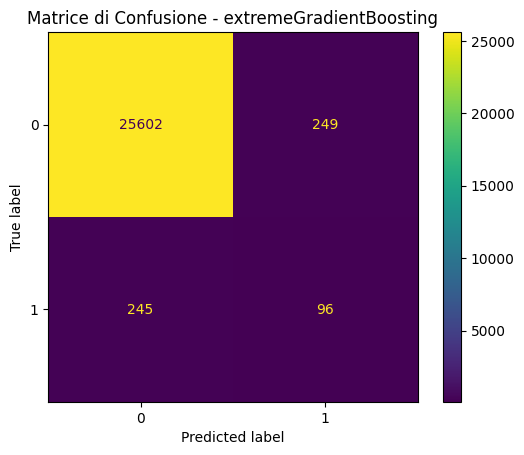

In [25]:
##################### SMOTE #######################################

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
        ('multi_word2vec', MultiColumnWord2Vec(model=bioword_model, columns=columns_to_vectorize)),
        ('smote', SMOTE(random_state=42)),
        ('classificazione', clf)
    ])

    # Fit the pipeline to the data
    pipeline.fit(X, y)

    # Trasforma i dati e ottieni la dimensione
    X_word2vec = pipeline.named_steps['multi_word2vec'].transform(X)
    num_samples, num_features = X_word2vec.shape
    print(f"Dimensione della matrice Word2Vec: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    
    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()


### Modello: extremeGradientBoosting ###
Dimensione della matrice Word2Vec: 26192 campioni, 2600 features
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.990952  0.987041  0.988992       0.000837    0.001510      0.000676   
1   0.242315  0.316387  0.273510       0.038552    0.067176      0.048522   

   Support  Avg Features  
0   2585.1        2600.0  
1     34.1        2600.0  
AUC medio: 0.9198
Numero medio di features: 2600.00


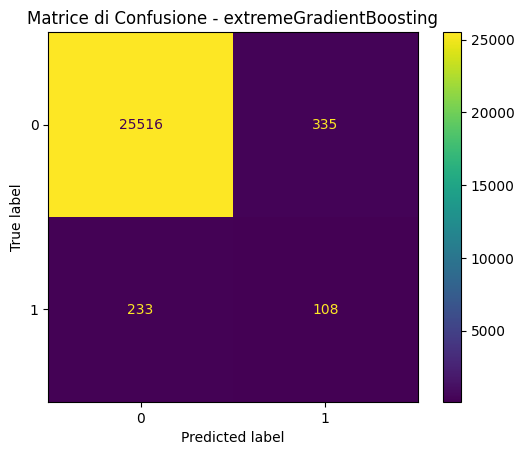

In [26]:
##################### SMOTE + UNDERSAMPLING #######################################

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
        ('multi_word2vec', MultiColumnWord2Vec(model=bioword_model, columns=columns_to_vectorize)),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.6)),  # Applica SMOTE fino al 60% della classe maggioritaria
        ('undersample', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),
        ('classificazione', clf)
    ])

    # Fit the pipeline to the data
    pipeline.fit(X, y)

    # Trasforma i dati e ottieni la dimensione
    X_word2vec = pipeline.named_steps['multi_word2vec'].transform(X)
    num_samples, num_features = X_word2vec.shape
    print(f"Dimensione della matrice Word2Vec: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    
    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()